<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [56]:
def sum_prod(X, V):
  return np.array(sum(X[i].dot(V[i]) for i in range( len(X))))
def sum_prod_test():
  np.testing.assert_array_equal(sum_prod([np.array([[1,0,1],[1,2,0],[2,0,1]]),np.array([[0,2,0],[0,0,1],[1,2,2]])],[[[1],[2],[1]],[[0],[1],[1]]]),np.array([[4],[6],[7]]))
  np.testing.assert_array_equal(sum_prod([np.array([[0,0,0],[0,0,0],[0,0,0]]),np.array([[0,0,0],[0,0,0],[0,0,0]])],[[[0],[0],[0]],[[0],[0],[0]]]),np.array([[0],[0],[0]]))
sum_prod_test()

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [53]:
def binarize(M, threshold=0.5):
  return np.where(M>threshold,1,0)
def binarize_test():
   np.testing.assert_array_equal(binarize(np.array([[1,2,3],[4,5,6],[7,8,9]]),5),np.array([[0,0,0],[0,0,1],[1,1,1]]))
   np.testing.assert_array_equal(binarize(np.array([[1,12,3],[4,53,62],[7,83,95]]),46),np.array([[0,0,0],[0,1,1],[0,1,1]]))
binarize_test()

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [39]:
def unique_rows(mat):
  result=""
  for i in mat:
    result+=str(set(i))
  return result
def unique_columns(mat):
  result=""
  for i in mat.T:
    result+=str(set(i))
  return result
def unique_test():
  assert unique_columns(np.array([[0,0,1],[2,3,4],[1,0,0]]))=="{0, 1, 2}{0, 3}{0, 1, 4}"
  assert unique_rows(np.array([[0,0,1],[2,3,4],[1,0,0]]))=="{0, 1}{2, 3, 4}{0, 1}"
  assert unique_rows(np.array([[0,0],[0,0]]))=="{0}{0}"
  assert unique_columns(np.array([[0,0],[0,0]]))=="{0}{0}"
unique_test()

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-36-0f41cc8c05e5>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if(axis is "column"):


Matrix is [[-0.66769143 -1.02158583 -1.44785755 -1.92555767  2.05051506]
 [ 0.62199754  0.1387757   0.23276153  0.67943978 -0.96674303]
 [ 0.04066262 -2.82781936 -1.21771843 -0.14074044  1.87131805]
 [-0.86070645 -1.67959899 -0.4611582   1.13587628 -0.52698681]]
Column means is [-0.21643443 -1.34755712 -0.72349316 -0.06274551  0.60702582]
Row means is [-0.60243548  0.1412463  -0.45485951 -0.47851483]


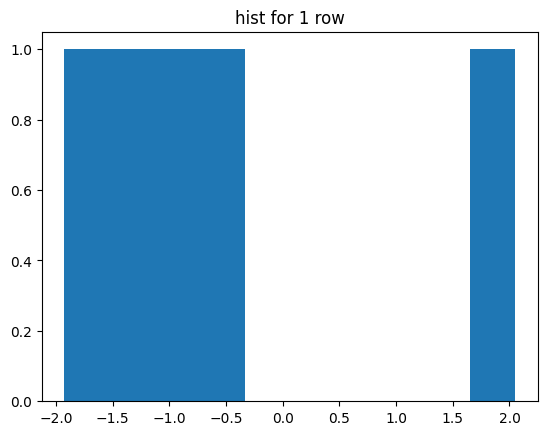

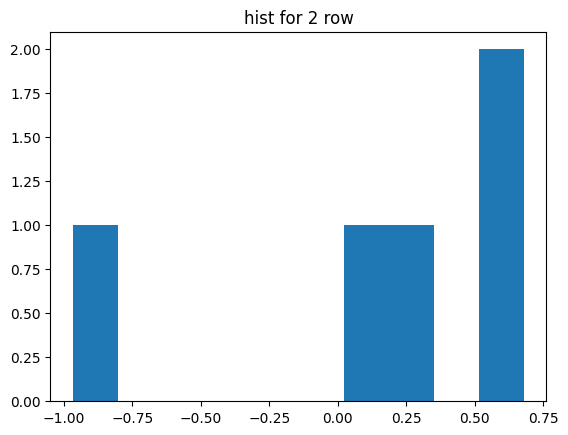

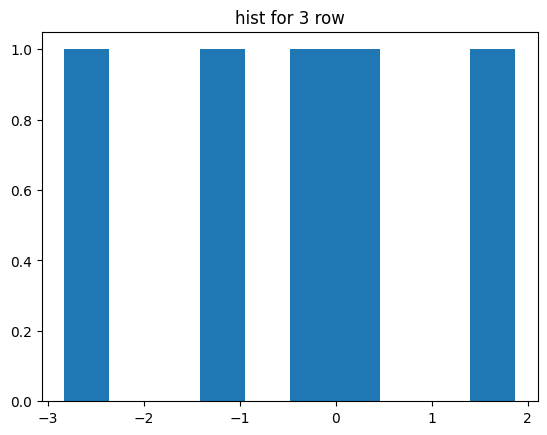

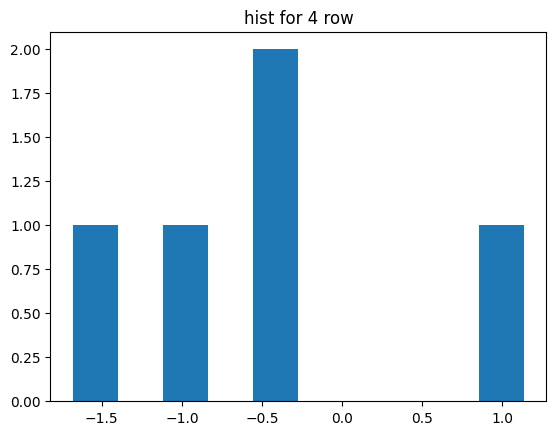

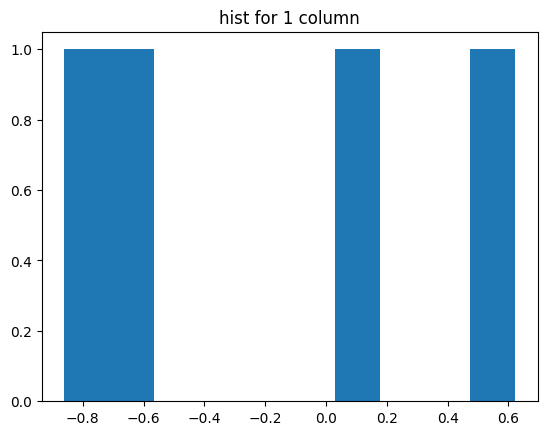

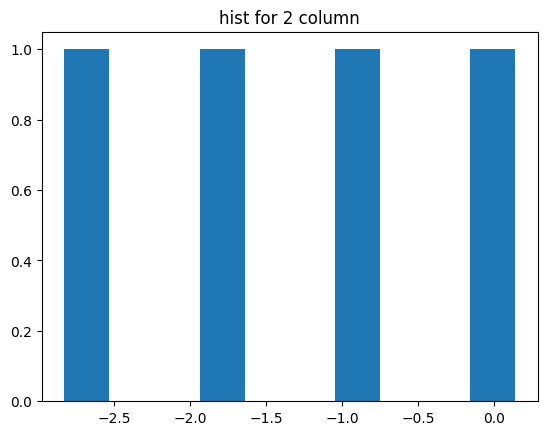

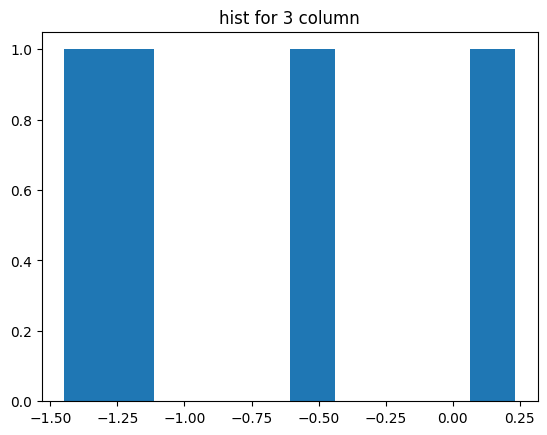

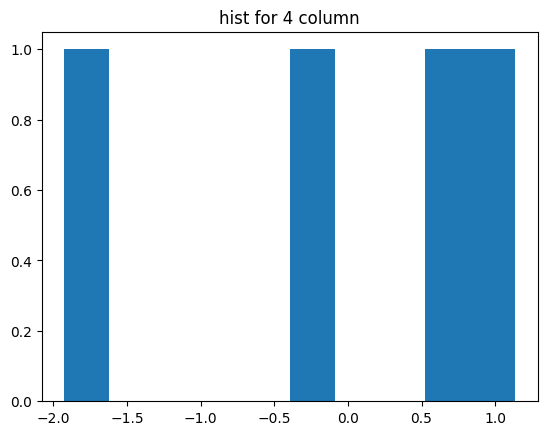

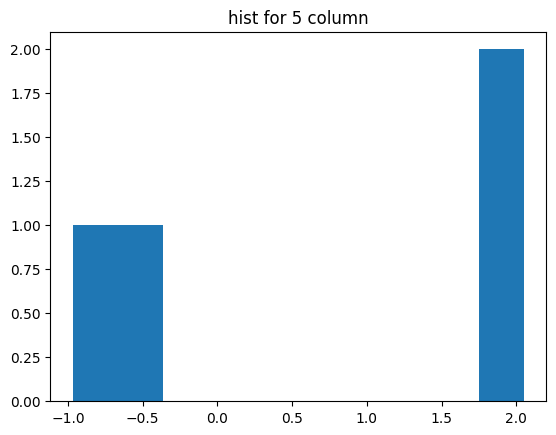

In [36]:
def show_hist(matrix,axis):
  if(axis is "column"):
    matrix=matrix.T
  count=1
  for i in matrix:
    plt.hist(i)
    plt.title(f'hist for {count} {axis}')
    count+=1
    plt.show()

def create_matrix(m, n):
  matrix=np.random.normal(size=(m,n))
  print("Matrix is "+str(matrix))
  column_means = np.mean(matrix, axis=0)
  print("Column means is "+str(column_means))
  row_means = np.mean(matrix, axis=1)
  print("Row means is "+str(row_means))
  show_hist(matrix,'row')
  show_hist(matrix,'column')
create_matrix(4,5)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [30]:
def chess(m, n,a,b):
  return(np.where((np.fromfunction(lambda i, j : (i+j)%2==0, (m, n))),a,b))
def chess_test():
  np.testing.assert_array_equal(chess(2,2,0,1),np.array([[0,1],[1,0]]))
  np.testing.assert_array_equal(chess(3,3,1,0),np.array([[1,0,1],[0,1,0],[1,0,1]]))
chess_test()

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

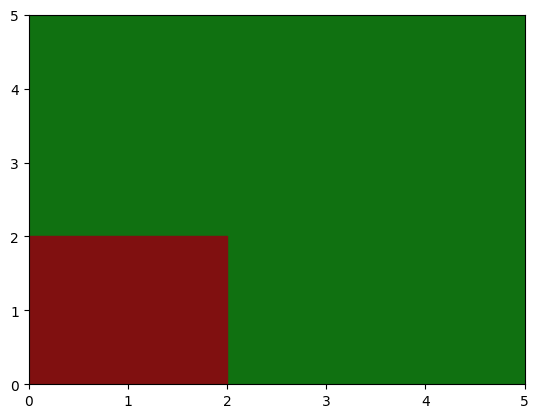

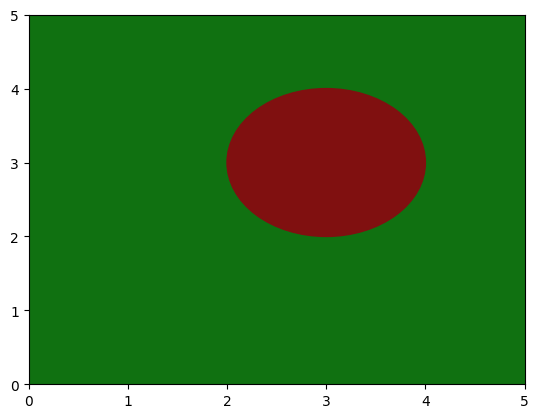

In [84]:
import matplotlib
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
  fig = plt.figure()
  ax = fig.add_subplot()
  rect=matplotlib.patches.Rectangle((0, 0),a,b,color=rectangle_color)
  ax.add_patch(rect)
  ax.set_facecolor(background_color)
  plt.xlim(0,m)
  plt.ylim(0,n)
  plt.show
def draw_ellipse(a, b, m, n, ellipse_color, background_color):
  fig = plt.figure()
  ax = fig.add_subplot()
  rect=matplotlib.patches.Ellipse((m-a,n-b),a,b,color=ellipse_color)
  ax.add_patch(rect)
  ax.set_facecolor(background_color)
  plt.xlim(0,m)
  plt.ylim(0,n)
  plt.show
draw_rectangle(2,2,5,5,'#801010','#107111')
draw_ellipse(2,2,5,5,'#801010','#107111')

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [13]:
def math_parameters(array,p):
  i=p
  print('Mean is '+str(np.mean(array)))
  print('Dispersion is '+str(np.var(array)))
  print('STD is '+str((np.var(array))**0.5))
  max = (array[1:-1] > array[:-2]) & (array[1:-1] > array[2:])
  min = (array[1:-1] < array[:-2]) & (array[1:-1] < array[2:])
  moving_averages = []
  while  i <= len(array):
    moving_averages.append(sum(array[i-p:i])/p)
    i += 1
  print('Moving averages is '+str(moving_averages))
  print("Local max is "+str(array[1:-1][max]))
  print("Local min is "+str(array[1:-1][min]))
math_parameters(np.array([1,2,3,4,5,4,3,2,1,2,3,2,1,2,3,4,5,6,5,4,3,2,1]),3)

Mean is 2.9565217391304346
Dispersion is 2.041587901701323
STD is 1.4288414543613028
Moving averages is [2.0, 3.0, 4.0, 4.333333333333333, 4.0, 3.0, 2.0, 1.6666666666666667, 2.0, 2.3333333333333335, 2.0, 1.6666666666666667, 2.0, 3.0, 4.0, 5.0, 5.333333333333333, 5.0, 4.0, 3.0, 2.0]
Local max is [5 3 6]
Local min is [1 1]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [14]:
def one_hot_encoding(vector):
  result=np.zeros((len(vector),len(vector)))
  for i in range(len(vector)):
    result[i,vector[i]]=1
  return result
print(one_hot_encoding([0, 2, 3, 0]))

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
